<a href="https://colab.research.google.com/github/aryelmedeiros/mineracao-de-dados/blob/main/Minera%C3%A7%C3%A3o_de_Dados_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 - Feature Selection

# Importando Conjunto de Dados


In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset files: /kaggle/input/housing-prices-dataset


In [32]:
!ls /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1

Housing.csv


In [33]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv")

In [34]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [36]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Pré Processamento

## Vericiando Dados Faltantes

In [12]:
import missingno as msno

<Axes: >

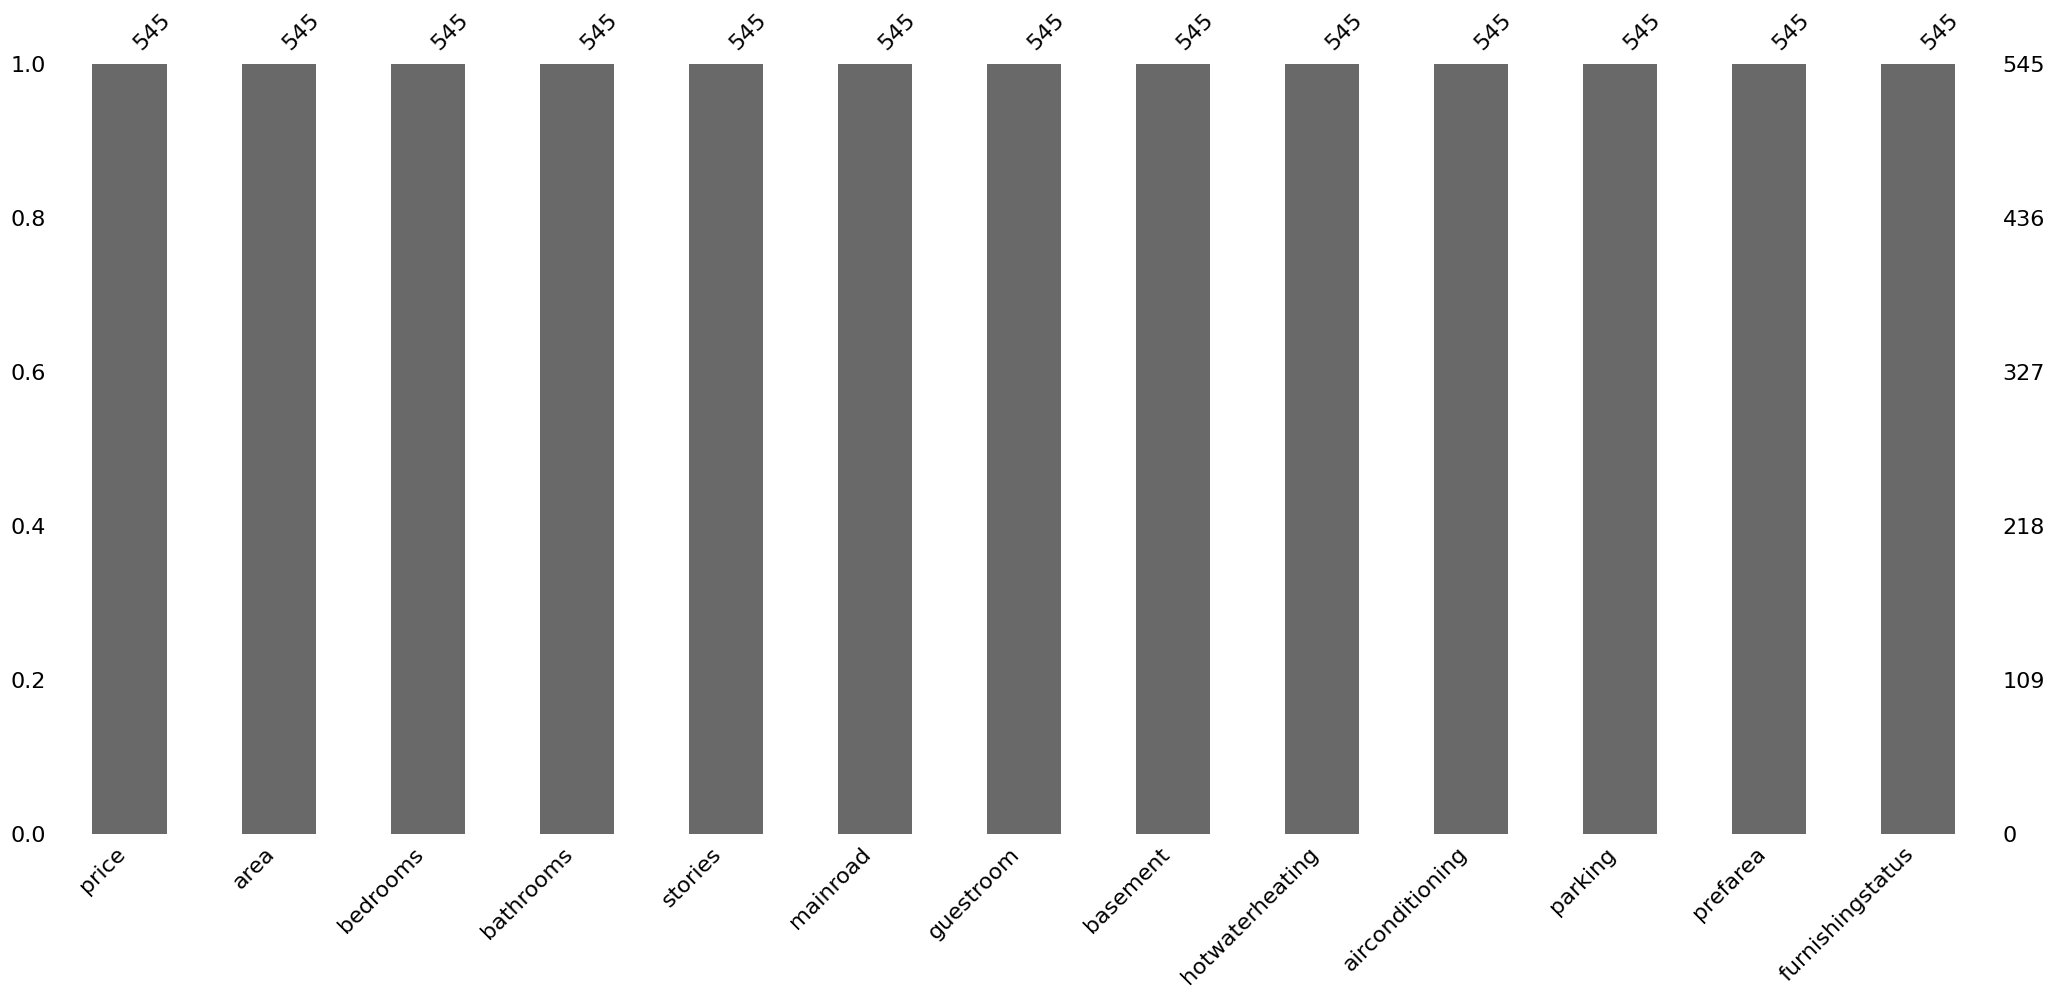

In [13]:
msno.bar(df)

In [15]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Como foi possivel verificar através da biblioteca Missgingno e tambem da propria verificação com o metodo `isnull` do Pandas, o dataset não possui dados faltantes.

## Ajuste de Colunas

In [38]:
#Separando os atributos por tipo

binarios = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

numericas = [
    'stories',
    'price',
    'area',
    'bedrooms',
    'bathrooms',
    'stories',
    'parking',
    ]


categoricas = ['furnishingstatus']

In [39]:
df["furnishingstatus"].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [40]:
for i in binarios:
  display(df[i].value_counts())

,count
mainroad,
yes,468
no,77


,count
guestroom,
no,448
yes,97


,count
basement,
no,354
yes,191


,count
hotwaterheating,
no,520
yes,25


,count
airconditioning,
no,373
yes,172


,count
prefarea,
no,417
yes,128


- Pela grande maioria das colunas categoricas se tratarem de atrivutos binarios (yes or no), basta apenas mapea-los para 0 ou 1, sem necessidade de utilizar tecnicas como OneHot-Enconding.

- Isso  siginifica que de todo o dataset, apenas uma unica coluna precisará passar pelo OneHot-Enconding, a `furnishingstatus`

In [41]:

df[binarios] = df[binarios].apply(
    lambda x: x.map({'yes': 1, 'no': 0})
)


In [42]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


# OneHot - Enonding

In [21]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = ohe.fit_transform(df[['furnishingstatus']])


In [45]:
encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [46]:
encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(['furnishingstatus']),
    index=df.index
)

encoded_df.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [47]:
df = df.drop(columns=['furnishingstatus'])
df = pd.concat([df, encoded_df], axis=1)


In [48]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


# Definindo o Conjuto X e Y

- X (features)
- y (Price)

In [49]:
X = df.drop(columns=['price'])
y = df["price"]

O Random Forest, modelo regressor a ser trabalhado nesse notebook (Random Forest) não exige que os dados sejam normalizados, o unico pré requisito é que todos os atributos sejam devidamente convertidos para variaveis númericas. A tecnica escolhida será o HotOne Enconding, visto que as variaveis categoricas não possuem uma hierarquia

# Feature Selection – Abordagem Filter

In [50]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#seltor das melhores features
selector = SelectKBest(
    score_func=mutual_info_regression,
    k=5
)

X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)



In [51]:
selected_features = X_train.columns[selector.get_support()]
print("Features selecionadas:")
print(selected_features.tolist())


Features selecionadas:
['area', 'stories', 'guestroom', 'parking', 'furnishingstatus_unfurnished']


In [52]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_sel, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = rf.predict(X_test_sel)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


MAE:  1209803.2975
RMSE: 1641818.2376
R²:   0.3741


## Avaliando

As metricas obtidtas:

*   **MAE**:  1209803.2975
*   **RMSE**: 1641818.2376
*   **R²**:   0.3741

Isso siginfica que o modelo está fraco, com um erro muito grande.


#  Feature Selection – Abordagem Embedded

In [55]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_full = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

rf_full.fit(X_train, y_train)



RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [56]:
importances = pd.Series(
    rf_full.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importances.head(10))


area                            0.467429
bathrooms                       0.156062
airconditioning                 0.056951
parking                         0.056520
stories                         0.054109
bedrooms                        0.046047
furnishingstatus_unfurnished    0.035488
basement                        0.033175
prefarea                        0.028441
hotwaterheating                 0.017748
dtype: float64


In [57]:
top5_features = importances.head(5).index.tolist()

print("Top 5 features:")
print(top5_features)


Top 5 features:
['area', 'bathrooms', 'airconditioning', 'parking', 'stories']


Vamos comparar com a abordagem anterior

In [58]:
print(selected_features)

Index(['area', 'stories', 'guestroom', 'parking',
       'furnishingstatus_unfurnished'],
      dtype='object')


Ou seja, apenas 3 das 5 features principais são iguais

## 2 Treinamento (Features Já Selecionadas)

In [59]:
rf_top5 = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

rf_top5.fit(X_train[top5_features], y_train)


RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [60]:
y_pred = rf_top5.predict(X_test[top5_features])

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


MAE:  1099613.5194
RMSE: 1503817.1063
R²:   0.5526


# Comparando Abordagens



## Quais foram as 5 features selecionadas pelo método Filter?

In [61]:
print(selected_features)

Index(['area', 'stories', 'guestroom', 'parking',
       'furnishingstatus_unfurnished'],
      dtype='object')


## Quais foram as 5 features selecionadas pela abordagem Embedded?

In [62]:
print(top5_features)

['area', 'bathrooms', 'airconditioning', 'parking', 'stories']


## Houve sobreposição entre os conjuntos de features?

Assim como já mencionado anteriormente, apenas 3 das 5 features se repeteriam em ambos conjuntos, sendo elas `area, stories e parking`

## Qual das duas abordagens gerou melhor desempenho do Random Forest?

A abordagem Embedded gerou um melhor desempenho, uma vez que apresentou erros menores e de acordo com o R², a abordagem Embedded é capaz de explicar a variancia da variavel alvo para uma maior porcentagem do Dataset